In [1]:
#Import Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split 
from sklearn import linear_model, preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import warnings 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
#Load the data
df = pd.read_csv("datanew.csv")

In [3]:
#Choose Method (i.e is this a p-test, z-score, regression, etc.)
#Since my data is concerning how many features affect one target value (Dropout vs. Graduate), I will be using regression to build a model given our features.

In [4]:
#Refamiliarize with Data
df.head()

,Unnamed: 0,Marital status,Application mode,Course,Daytime/evening attendance,Previous qualification,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,single,2nd phase,animation and multimedia design,daytime,High School,High School,No High School,"Personal Services, Security & Safety Workers",Unskilled Workers,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,single,other,tourism,daytime,High School,High School,College Degree,Intermediate Level Technicians & Professions,Intermediate Level Technicians & Professions,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,2,single,1st Phase,communication design,daytime,High School,High School,No High School,Unskilled Workers,Unskilled Workers,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,3,single,2nd phase,journalism and communication,daytime,High School,High School,No High School,"Personal Services, Security & Safety Workers",Intermediate Level Technicians & Professions,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,4,other,other,social service (evening),evening,High School,High School,No High School,Unskilled Workers,Unskilled Workers,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [5]:
df.dtypes

Unnamed: 0                                          int64
Marital status                                     object
Application mode                                   object
Course                                             object
Daytime/evening attendance                         object
Previous qualification                             object
Mother's qualification                             object
Father's qualification                             object
Mother's occupation                                object
Father's occupation                                object
Displaced                                          object
Educational special needs                          object
Debtor                                             object
Tuition fees up to date                            object
Gender                                             object
Scholarship holder                                 object
Age at enrollment                                   int64
International 

In [6]:
df.info

<bound method DataFrame.info of       Unnamed: 0 Marital status Application mode  \
0              0         single        2nd phase   
1              1         single            other   
2              2         single        1st Phase   
3              3         single        2nd phase   
4              4          other            other   
...          ...            ...              ...   
4419        4419         single        1st Phase   
4420        4420         single        1st Phase   
4421        4421         single        1st Phase   
4422        4422         single        1st Phase   
4423        4423         single            other   

                               Course Daytime/evening attendance  \
0     animation and multimedia design                    daytime   
1                             tourism                    daytime   
2                communication design                    daytime   
3        journalism and communication                    daytime   
4  

In [7]:
df.shape

(4424, 34)

In [8]:
#Choose Dependent Variable
#For this analysis, I am analyzing dropout rates so we can analyze which of our features in the data set lead to dropouts. 
#Given how many of my data points are categories, I will need to binarize those columns to use them in a regression.
#When analyzing my target value counts, there are 794 students currently enrolled, meaning they have neither graduated nor dropped out. 
#I will subset the data to just analyze the 3630 students who have graduated or dropped out. 
df["Target"].value_counts()

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [9]:
#Subset Data Frame for Target (either Dropped Out or Graduated)
df = df[df['Target'] != "Enrolled"]
df["Target"].value_counts()

Target
Graduate    2209
Dropout     1421
Name: count, dtype: int64

In [10]:
#Family Occupation is telling us a lot of the same things as Family Qualification. Remove Occupation
df = df.drop(columns=["Mother's occupation", "Father's occupation"])
df.head()

,Unnamed: 0,Marital status,Application mode,Course,Daytime/evening attendance,Previous qualification,Mother's qualification,Father's qualification,Displaced,Educational special needs,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,single,2nd phase,animation and multimedia design,daytime,High School,High School,No High School,yes,no,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,single,other,tourism,daytime,High School,High School,College Degree,yes,no,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,2,single,1st Phase,communication design,daytime,High School,High School,No High School,yes,no,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,3,single,2nd phase,journalism and communication,daytime,High School,High School,No High School,yes,no,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,4,other,other,social service (evening),evening,High School,High School,No High School,no,no,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [11]:
#When I first made the binarized set below, there were 110 columns. Simplifying descriptors from wrangling and restarting data.
#Maritial Status: 88% of applicants are single, switch to single vs. other
#dict_ms = {1 : 'single', 2: 'other', 3: 'other', 4: 'other', 5: 'other', 6: 'other'}
#Application Mode: Simplify to Phase 1, Phase 2 and Other
#dict_am = {1: '1st Phase', 2: 'other', 3: '1st Phase', 4: '1st Phase', 5: 'other', 6: 'other', 7: '1st Phase', 8: '2nd phase', 9: 'other', 10: 'other', 11: 'other', 12: 'other', 13: 'other', 14: 'other', 15: 'other', 16: 'other', 17: 'other', 18: 'other'}
#Course: Needs to Stay To Analyze Different Programs
#Daytime/Evening: Binary No Change
#Previous Qualification: Change to No HS, High School, College Degree
#dict_pq = {1: 'High School', 2: "College Degree", 3: 'College Degree', 4: 'College Degree', 5: 'College Degree', 6: 'High School', 7: 'Some High School', 8: 'No High School', 9: 'No High School', 10: 'No High School', 11: 'No High School', 12: 'No High School', 13: 'No High School', 14: 'High School', 15: 'College Degree', 16: 'High School', 17: 'College Degree'}
#Mother/Father Qualification: Change to Some Schooling, HS, Some College, College
#dict_qual = {1: 'High School', 2: "College Degree", 3: 'College Degree', 4: 'College Degree', 5: 'College Degree', 6: 'Some College', 7: 'No High School', 8: 'No High School', 9: 'No High School', 10: 'No High School', 11: 'No High School', 12: 'No High School', 13: 'High School', 14: 'No High School', 15: 'No High School', 16: 'High School', 17: 'No High School', 18: 'No High School', 19: "No High School", 20: 'No High School', 21: 'No High School', 22: 'High School', 23: 'High School', 24: 'No High School', 25: 'No High School', 26: 'No High School', 27: 'No High School', 28: "No High School", 29: "High School", 30: "College Degree", 31: "College Degree", 32: "College Degree", 33: "College Degree", 34: "College Degree"}
#Diplaced: Binary, No Change
#Special Needs: Binary, No Change
#Debtor: Binary, No Change
#Fees: Binary, No Change
#Gender: Binary, No Change
#Scholarship: Binary, No Change
#International: Binary, No Change

In [12]:
#Identify Object Columns to Binarize
object_columns = df.select_dtypes(object)
obj = object_columns.columns
#Numerical Columns to merge with the Binarized Columns
num_columns = df.select_dtypes([float, int])
num = num_columns.columns

In [13]:
#Binarize Variables
bdf = pd.get_dummies(df[obj], dtype='int')
ndf = df[num]

In [14]:
#Re-Merge Binary Portion of DataFrame and Numerical Portion of DataFrame
df2 = pd.concat([bdf, ndf], axis=1)
df2.shape

(3630, 69)

In [15]:
#Visualize Correlations Numerically
pd.set_option('display.max_columns', 69)
pd.set_option('display.max_rows', 69)
df2.corr()

,Marital status_other,Marital status_single,Application mode_1st Phase,Application mode_2nd phase,Application mode_other,Course_advertising and marketing management,Course_animation and multimedia design,Course_argonomy,Course_basic education,Course_biofuel production technologies,Course_communication design,Course_equiniculture,Course_informatics engineering,Course_journalism and communication,Course_management,Course_management (evening),Course_nursing,Course_oral hygiene,Course_social service,Course_social service (evening),Course_tourism,Course_vetinary nursing,Daytime/evening attendance_daytime,Daytime/evening attendance_evening,Previous qualification_College Degree,Previous qualification_High School,Previous qualification_No High School,Previous qualification_Some High School,Mother's qualification_College Degree,Mother's qualification_High School,Mother's qualification_No High School,Mother's qualification_Some College,Father's qualification_College Degree,Father's qualification_High School,Father's qualification_No High School,Father's qualification_Some College,Displaced_no,Displaced_yes,Educational special needs_no,Educational special needs_yes,Debtor_no,Debtor_yes,Tuition fees up to date_no,Tuition fees up to date_yes,Gender_female,Gender_male,Scholarship holder_no,Scholarship holder_yes,International_no,International_yes,Target_Dropout,Target_Graduate,Unnamed: 0,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
Marital status_other,1.000000,-1.000000,-0.215367,-0.172897,0.363631,-0.039694,-0.071519,0.037813,0.000615,-0.001175,-0.049876,-0.001181,-0.018137,-0.066070,0.005514,0.240775,-0.074978,0.017509,-0.058142,0.242204,-0.029309,-0.053011,-0.352021,0.352021,0.114924,-0.300667,0.290953,0.041741,-0.083126,0.046284,0.040361,-0.012191,-0.066067,-0.095166,0.125981,-0.008618,0.280064,-0.280064,0.030587,-0.030587,-0.037450,0.037450,0.103278,-0.103278,-0.037113,0.037113,0.113687,-0.113687,0.029180,-0.029180,0.119142,-0.119142,0.035052,0.635795,0.094521,0.065122,0.073393,-0.039228,-0.074983,0.043187,0.089794,0.036224,0.027096,-0.063148,-0.079829,0.021342,-0.037256,0.010075,-0.063705
Marital status_single,-1.000000,1.000000,0.215367,0.172897,-0.363631,0.039694,0.071519,-0.037813,-0.000615,0.001175,0.049876,0.001181,0.018137,0.066070,-0.005514,-0.240775,0.074978,-0.017509,0.058142,-0.242204,0.029309,0.053011,0.352021,-0.352021,-0.114924,0.300667,-0.290953,-0.041741,0.083126,-0.046284,-0.040361,0.012191,0.066067,0.095166,-0.125981,0.008618,-0.280064,0.280064,-0.030587,0.030587,0.037450,-0.037450,-0.103278,0.103278,0.037113,-0.037113,-0.113687,0.113687,-0.029180,0.029180,-0.119142,0.119142,-0.035052,-0.635795,-0.094521,-0.065122,-0.073393,0.039228,0.074983,-0.043187,-0.089794,-0.036224,-0.027096,0.063148,0.079829,-0.021342,0.037256,-0.010075,0.063705
Application mode_1st Phase,-0.215367,0.215367,1.000000,-0.433552,-0.670413,-0.022443,0.119979,-0.146611,-0.019288,-0.032545,0.030434,-0.000514,-0.079476,0.091018,0.007934,-0.153426,0.145707,-0.044746,0.051347,-0.129306,-0.011220,-0.004068,0.206490,-0.206490,0.127958,0.071782,-0.212314,-0.048347,0.036672,-0.015098,-0.028581,0.021125,-0.006091,0.030301,-0.023280,0.003092,-0.190555,0.190555,-0.013902,0.013902,0.090193,-0.090193,-0.121203,0.121203,0.130961,-0.130961,-0.124075,0.124075,0.037947,-0.037947,-0.205772,0.205772,-0.004407,-0.341283,-0.125470,-0.094375,-0.148350,0.058376,0.103875,-0.010185,-0.128079,-0.075338,-0.110082,0.090667,0.111633,-0.026249,-0.058984,0.022931,0.008899
Application mode_2nd phase,-0.172897,0.172897,-0.433

<Axes: >

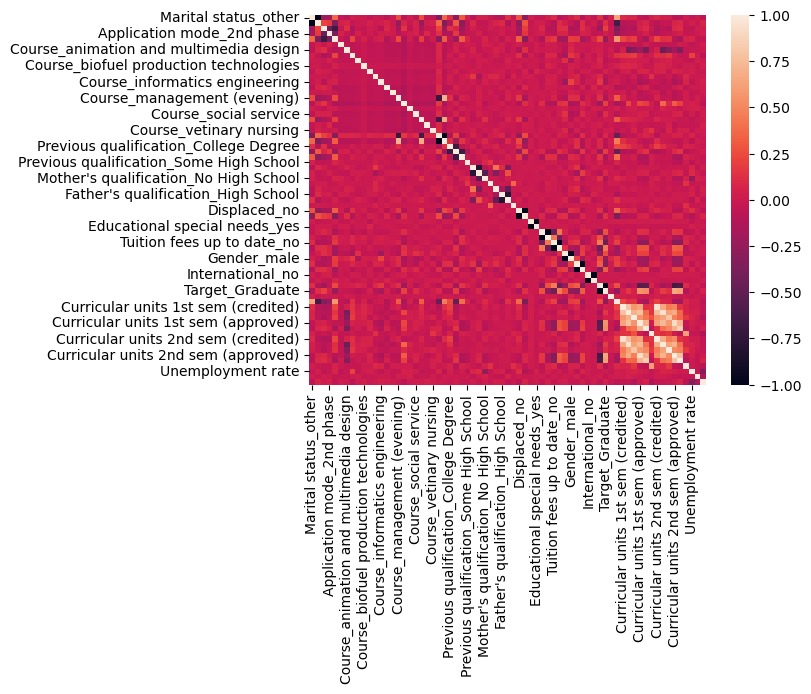

In [16]:
#Visualize Correlations w/ Heatmap
corr = df2.corr()
sns.heatmap(corr)

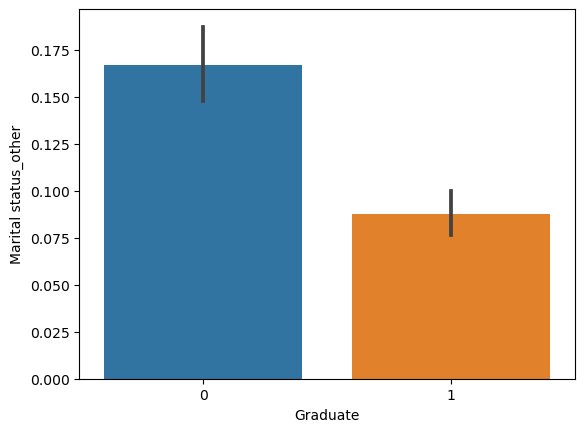

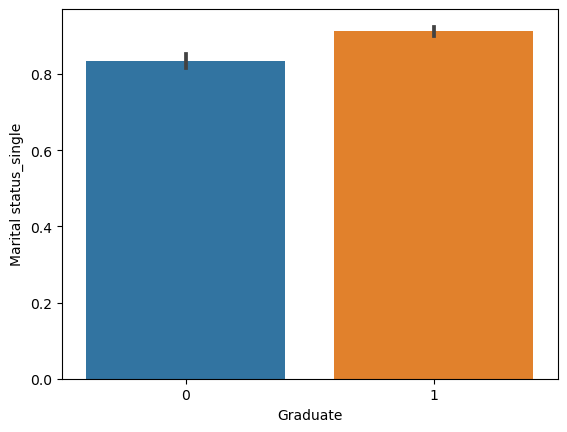

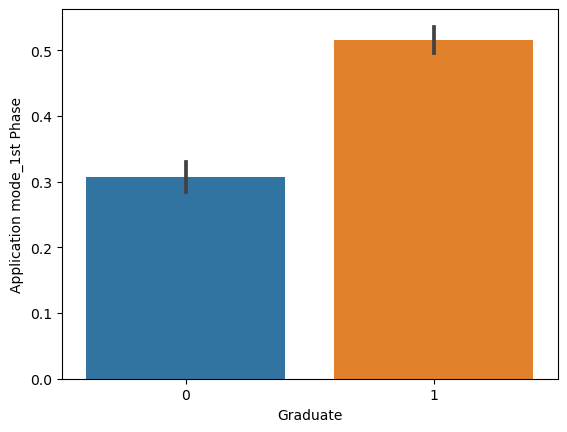

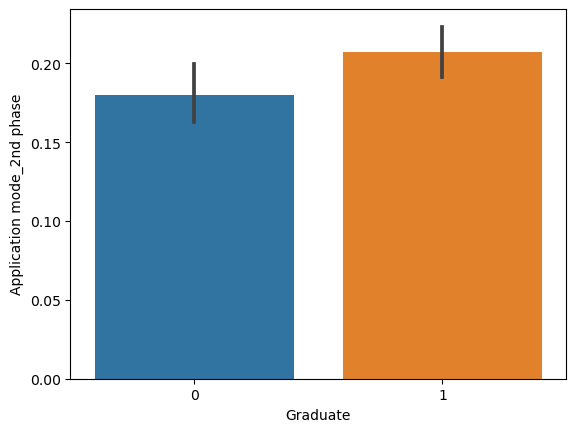

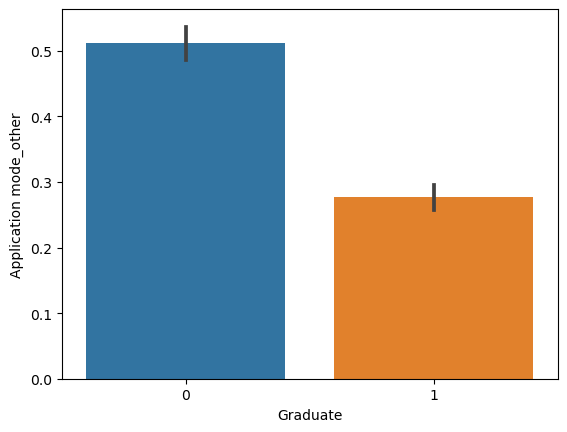

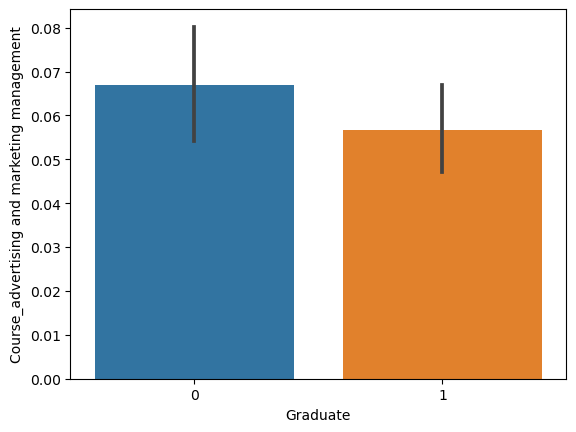

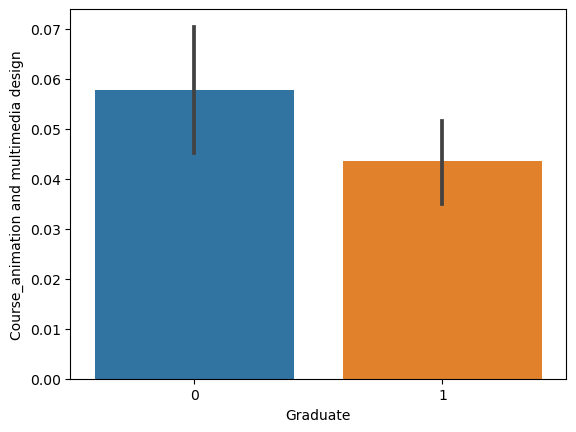

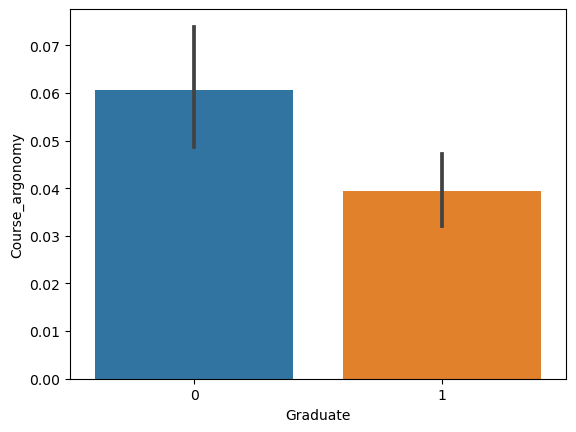

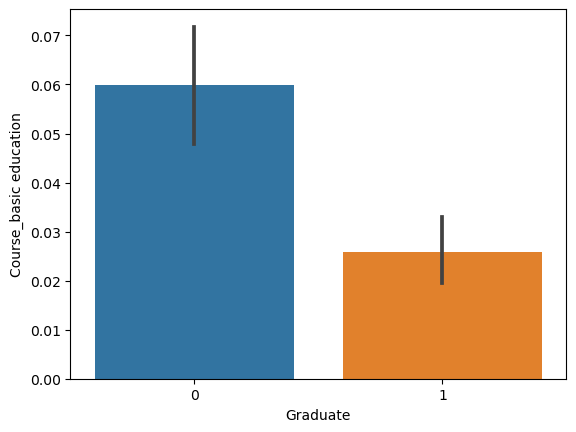

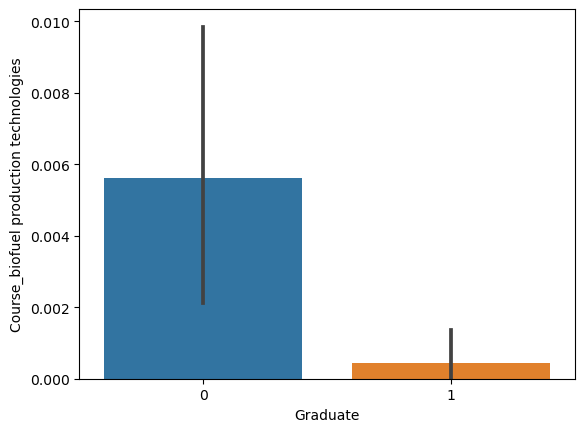

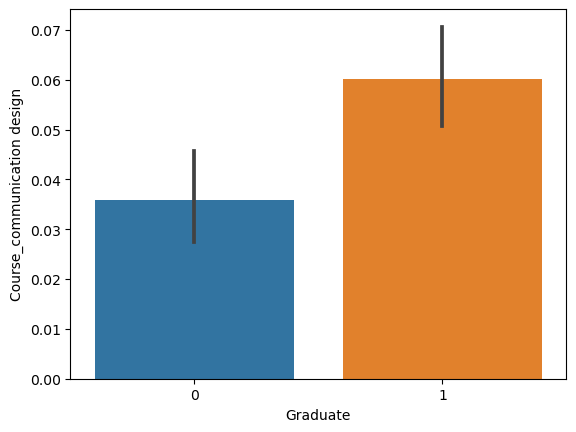

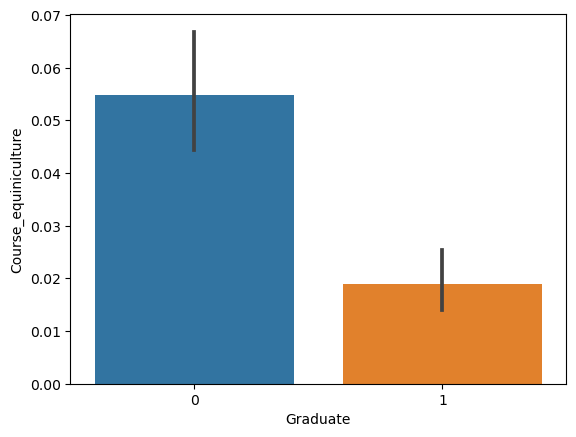

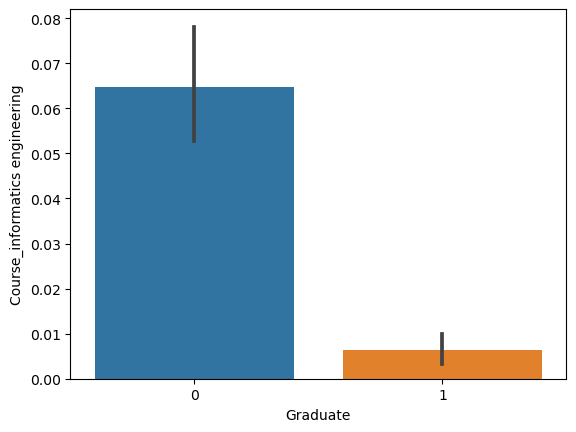

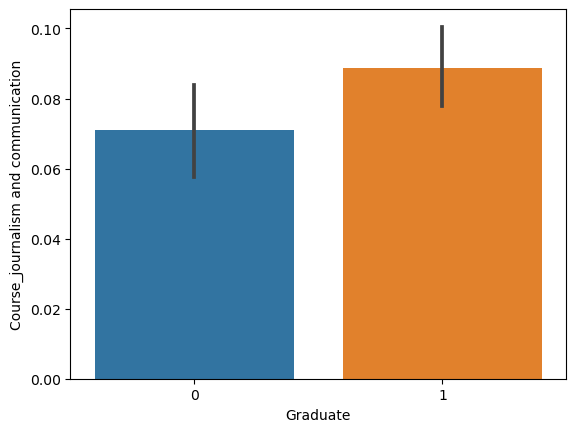

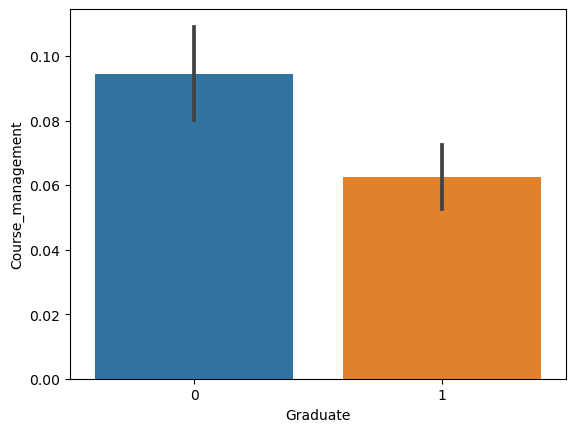

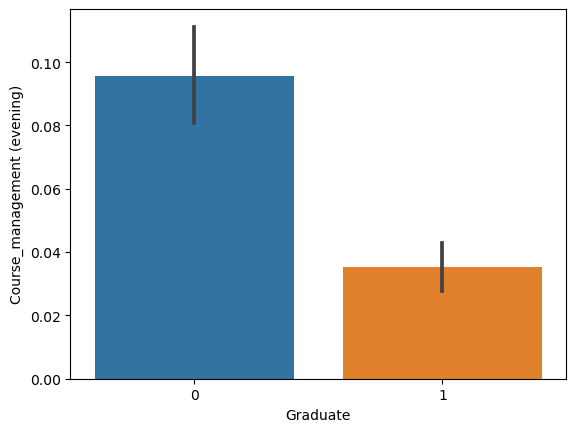

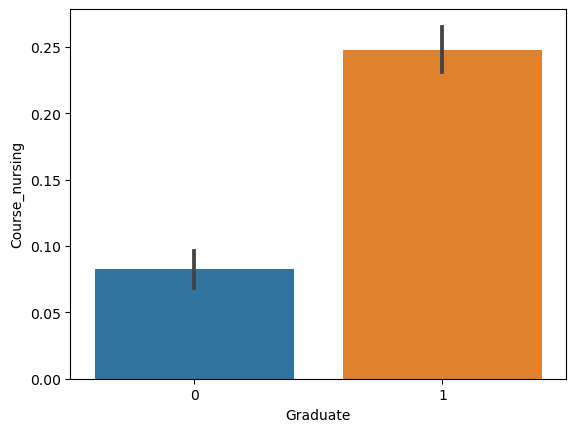

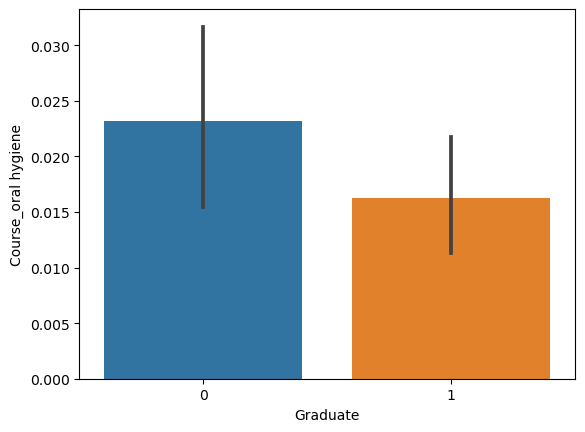

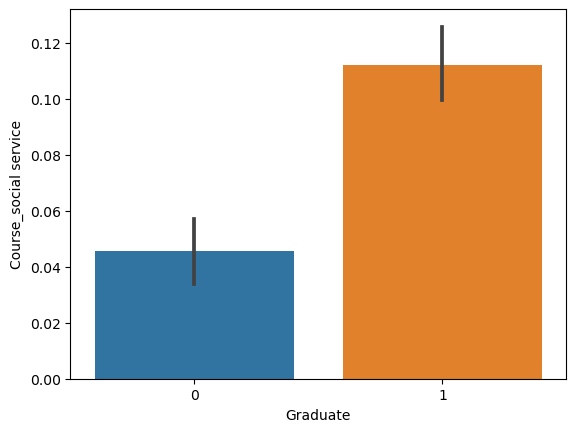

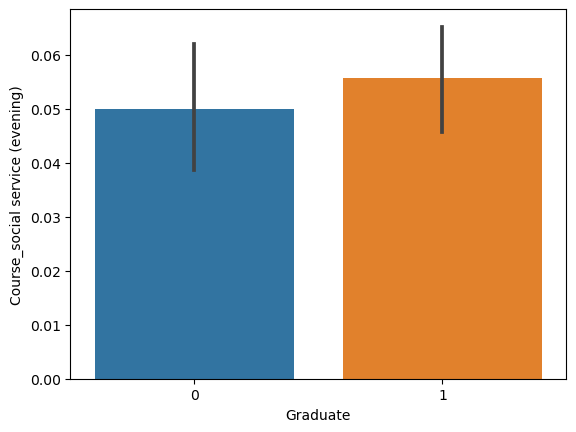

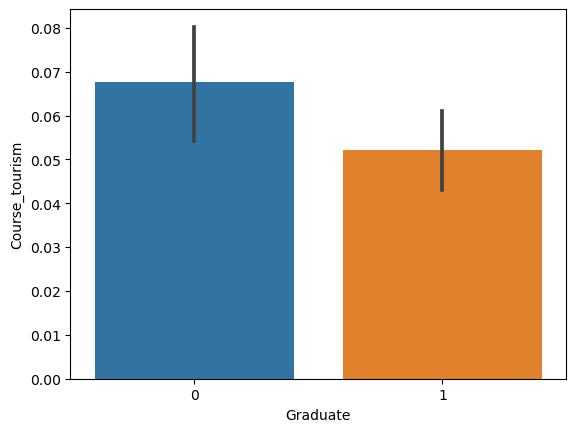

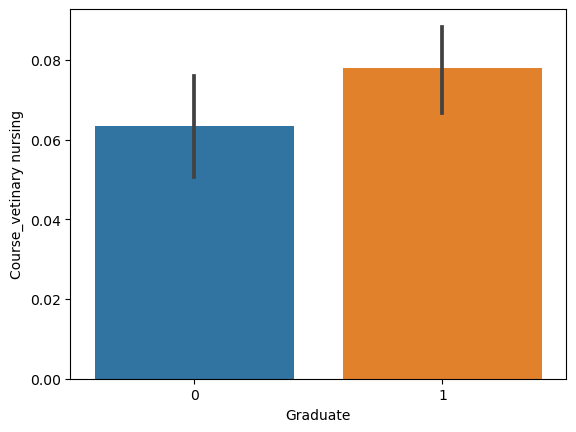

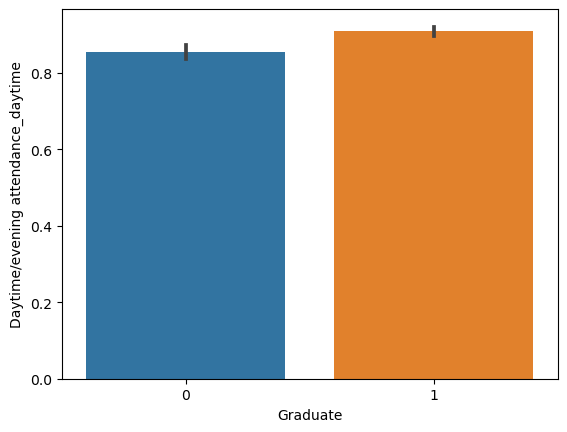

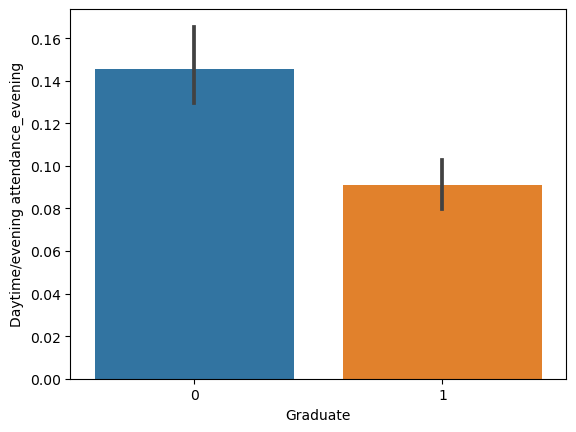

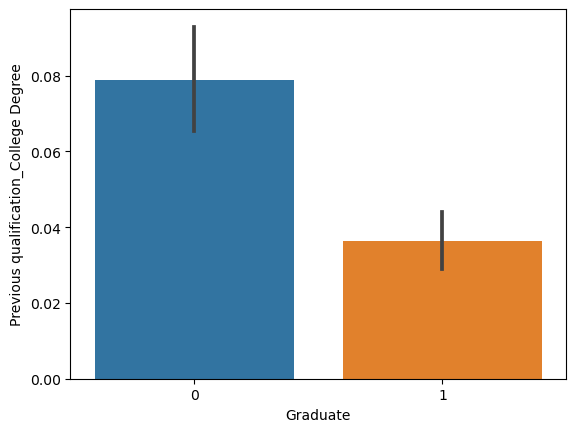

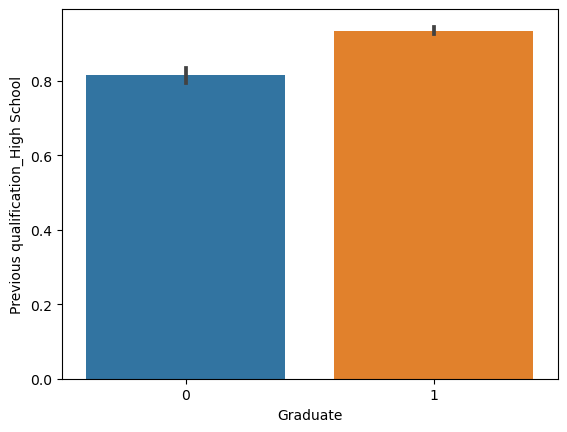

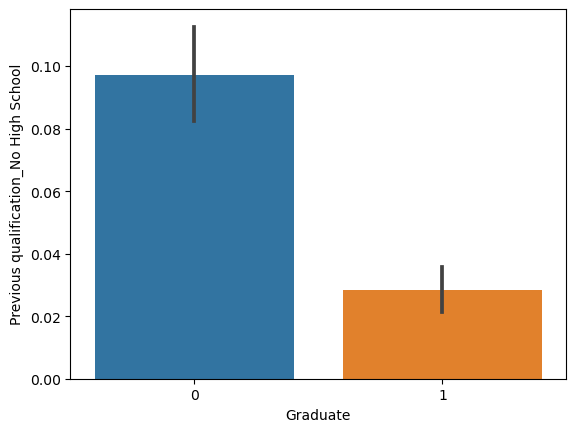

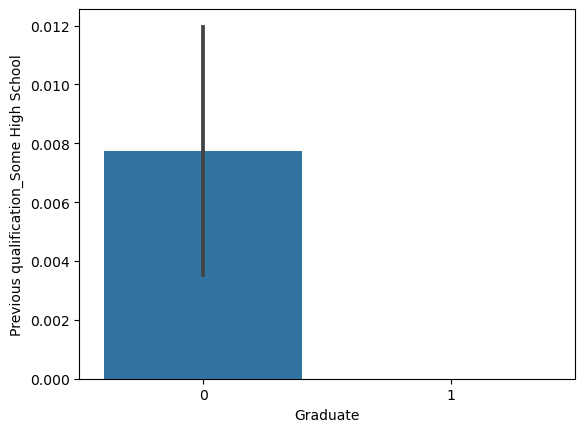

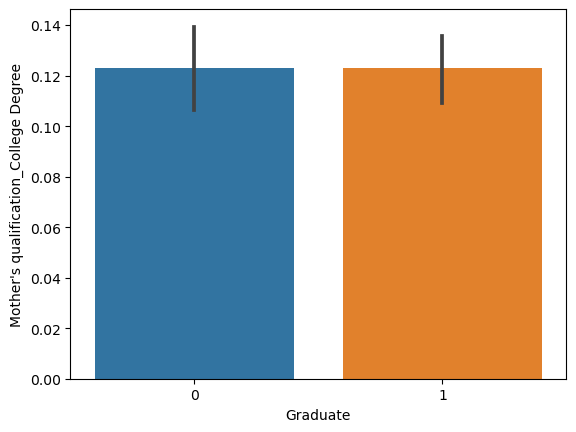

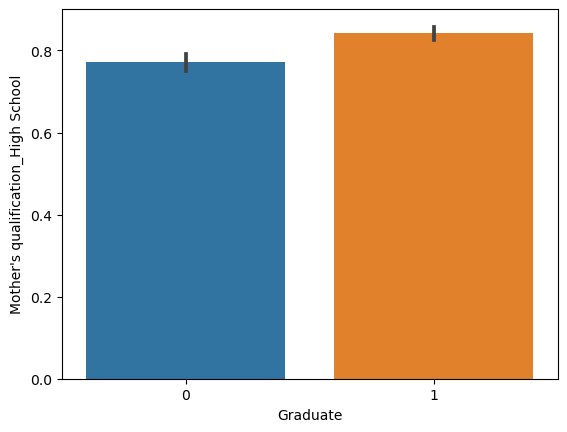

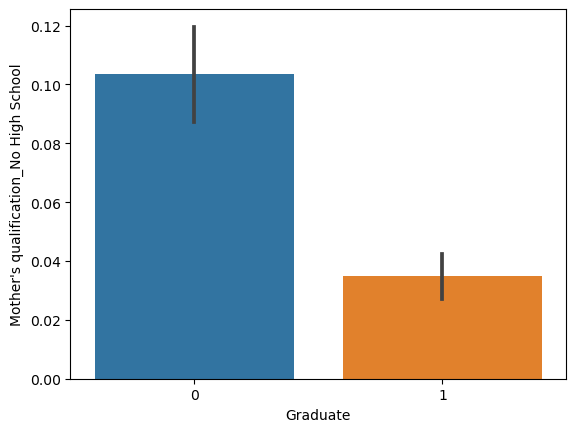

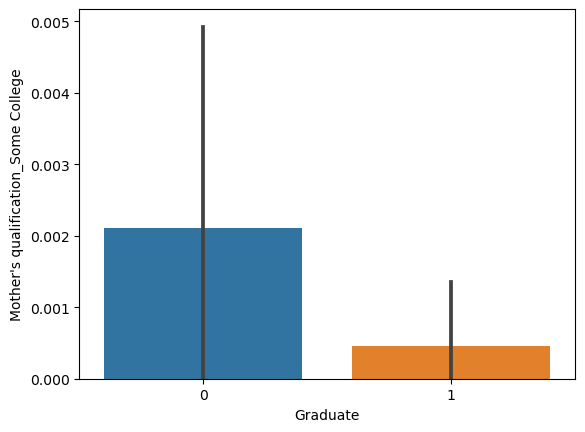

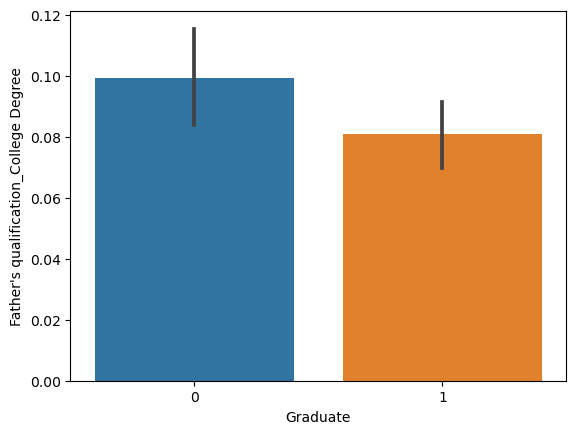

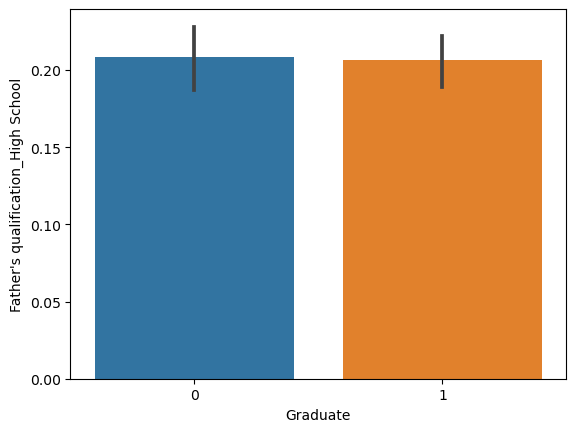

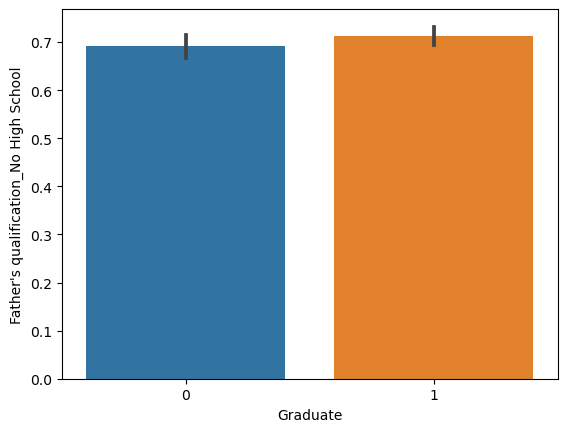

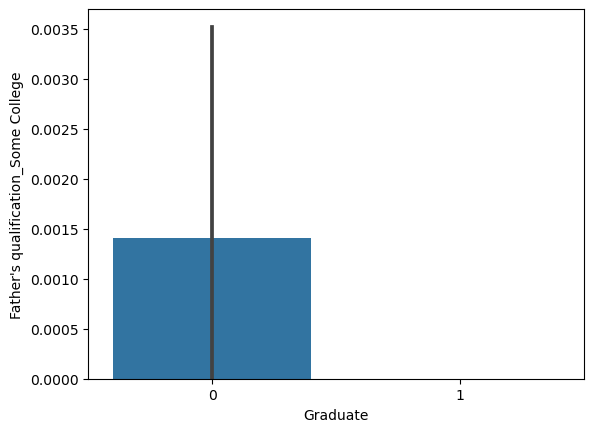

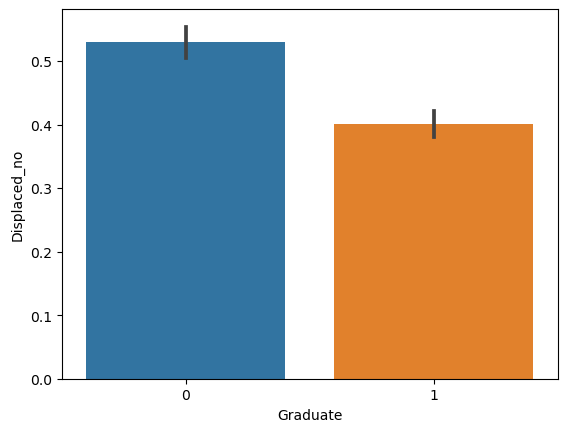

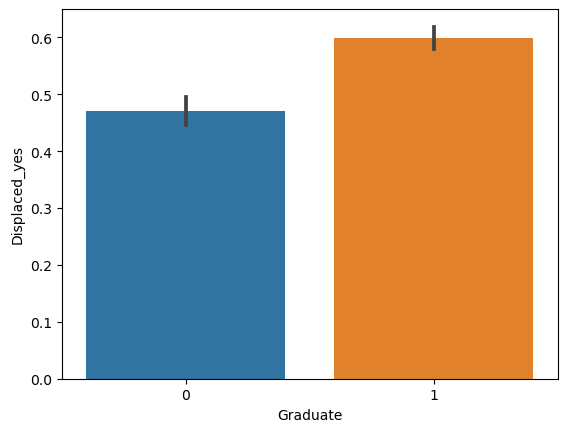

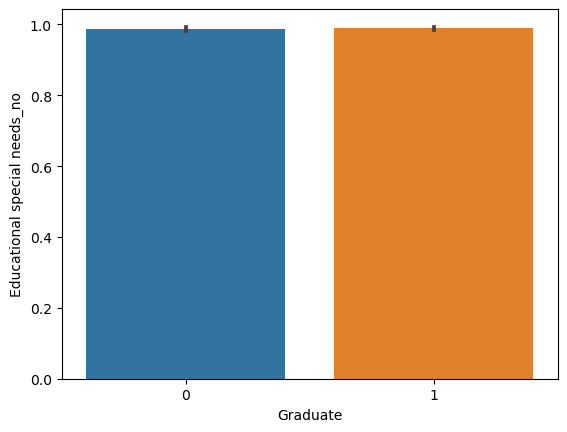

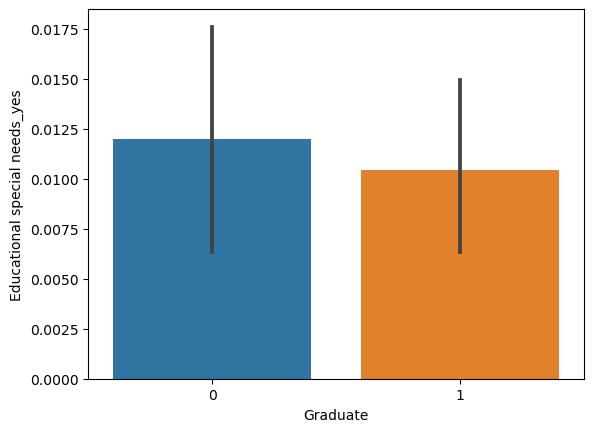

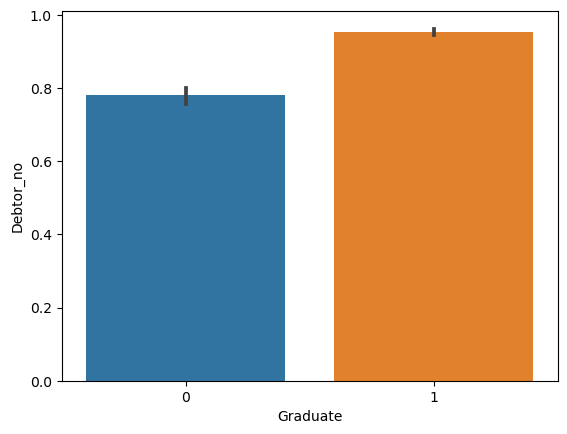

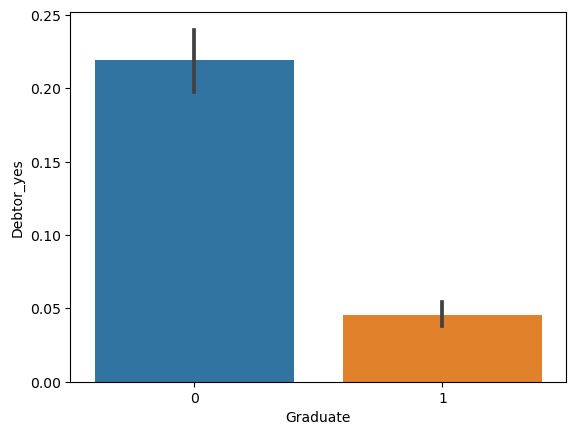

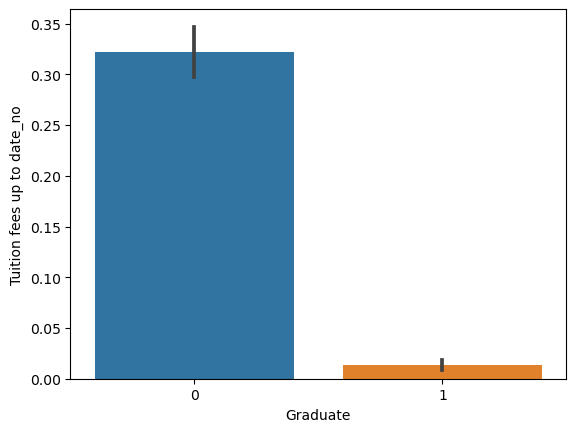

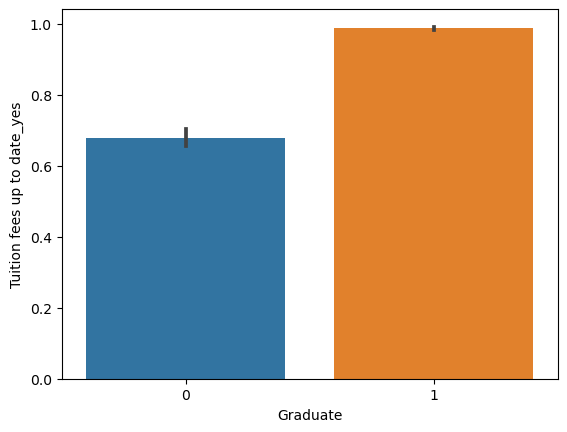

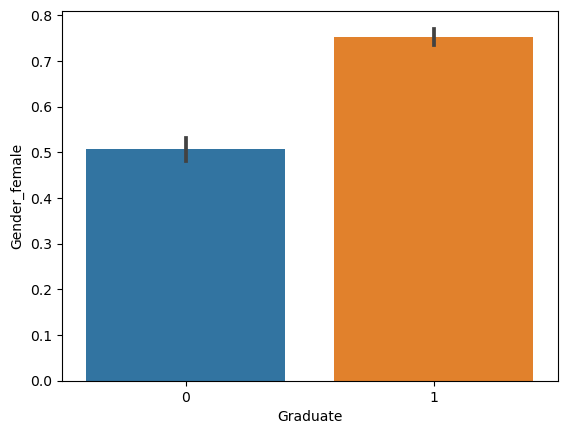

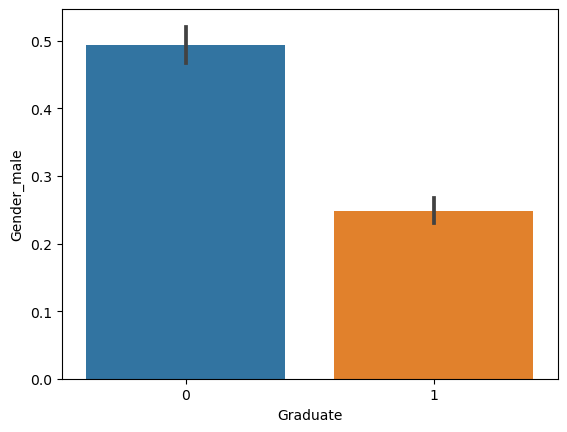

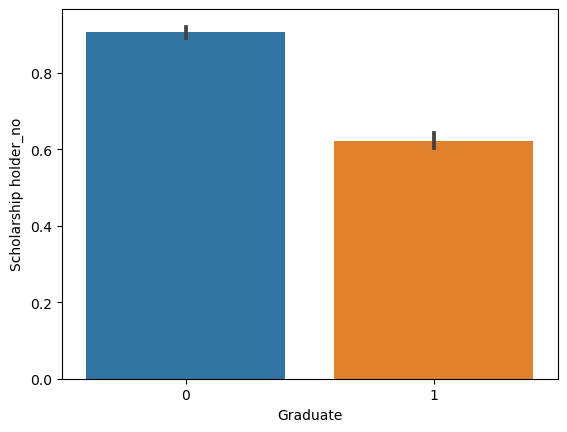

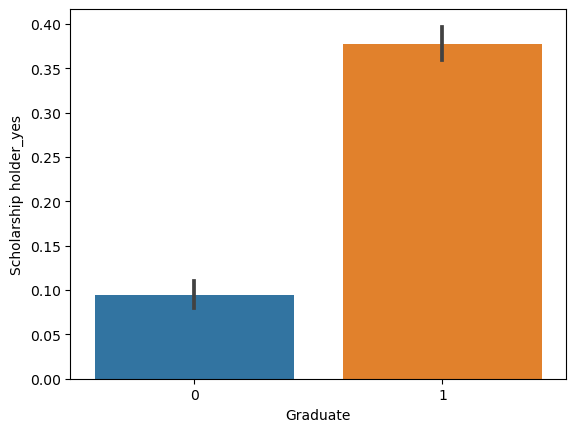

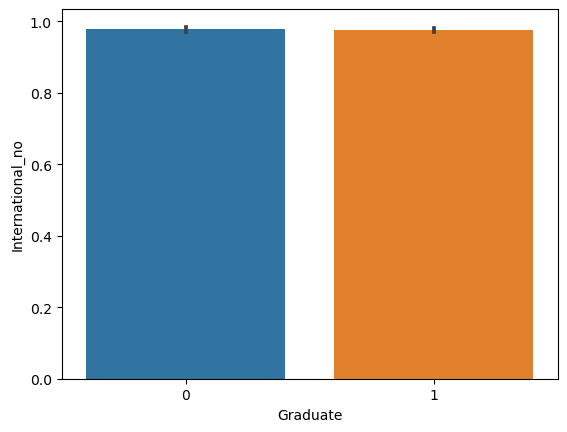

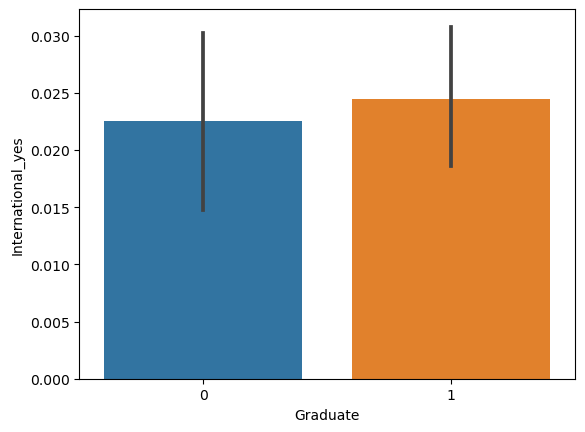

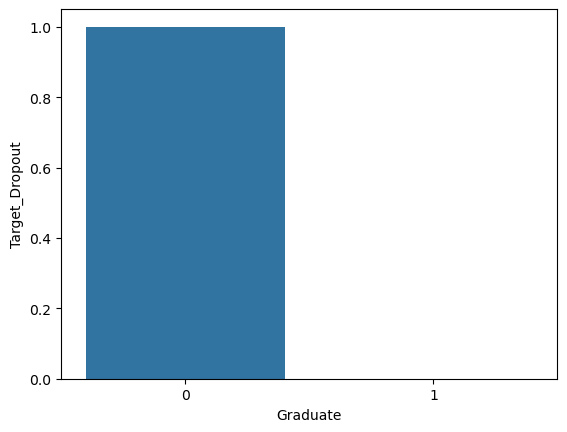

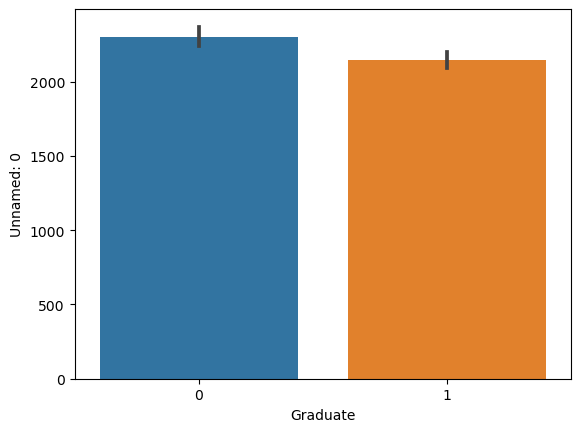

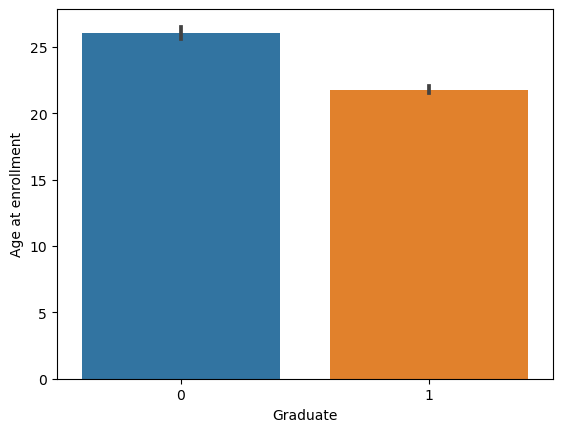

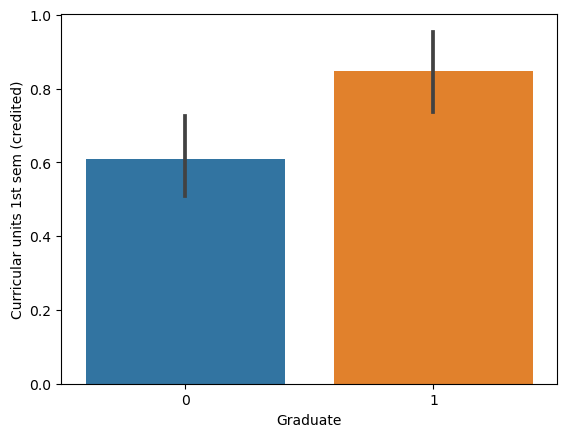

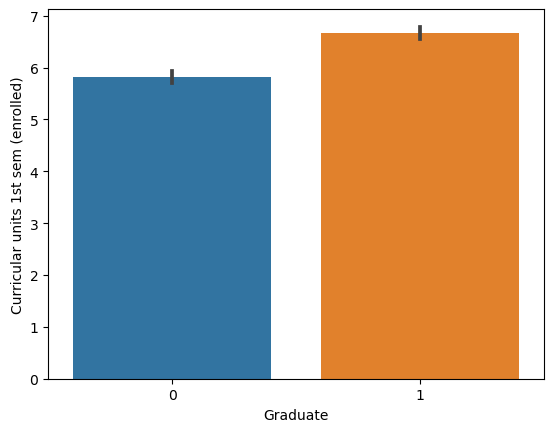

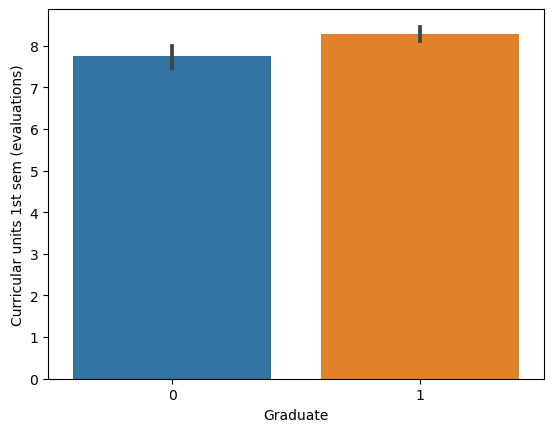

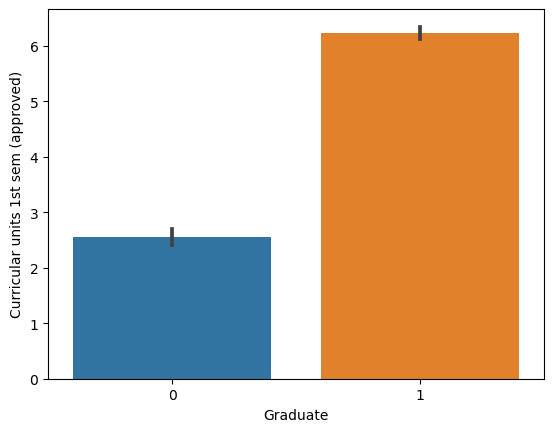

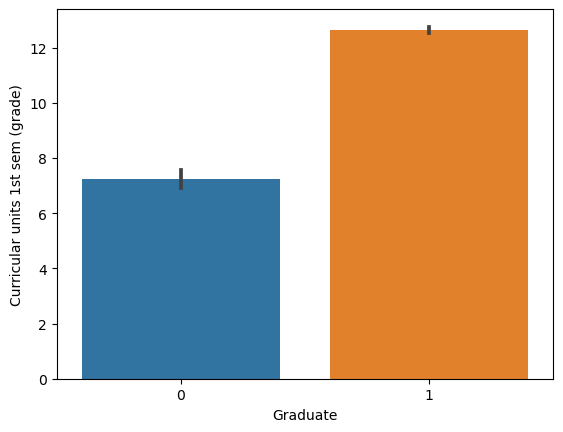

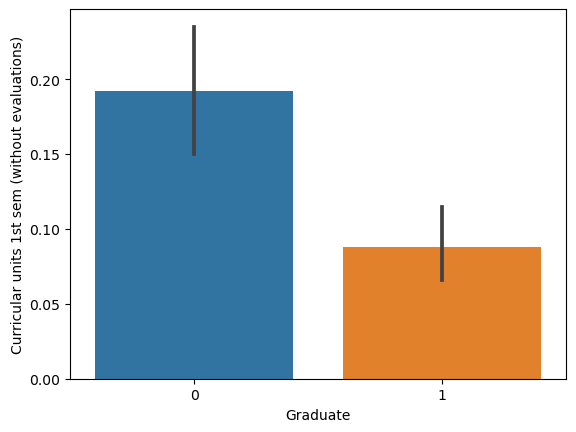

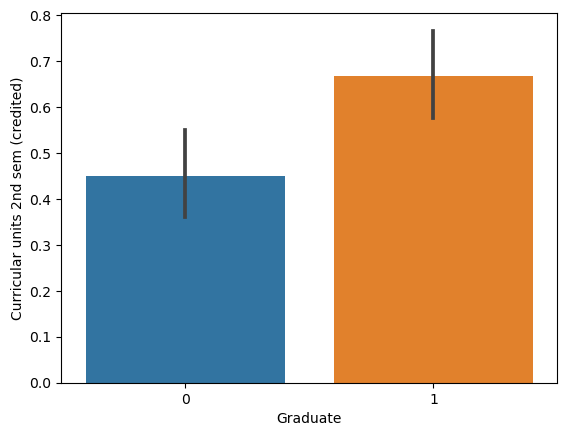

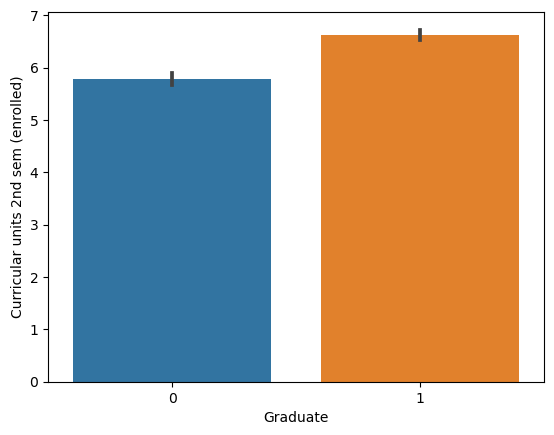

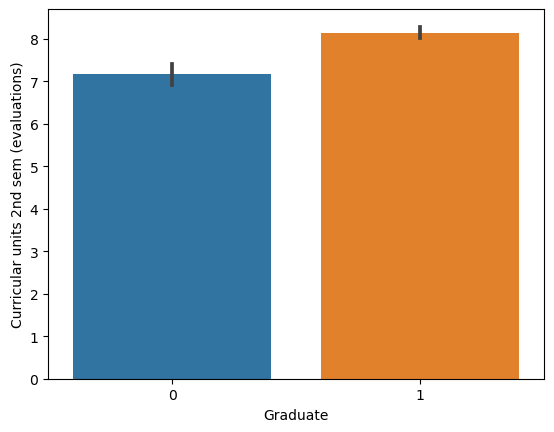

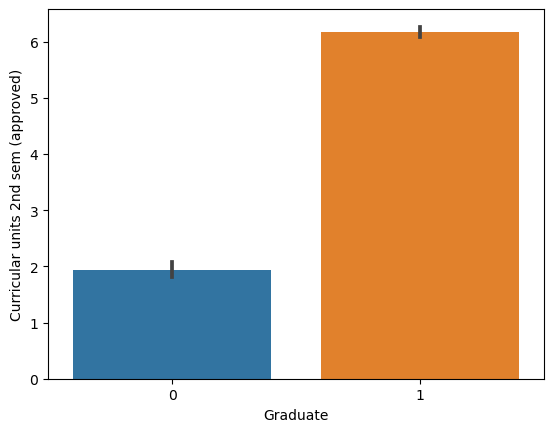

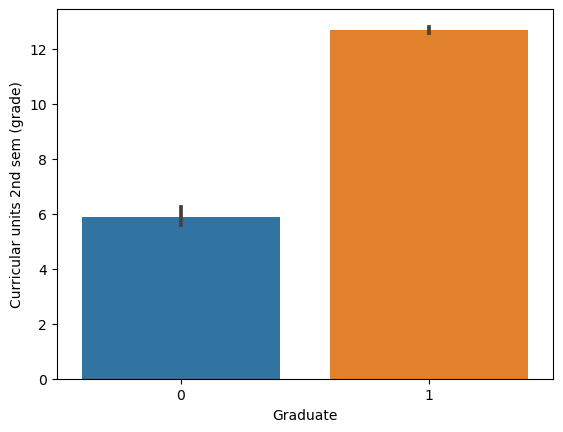

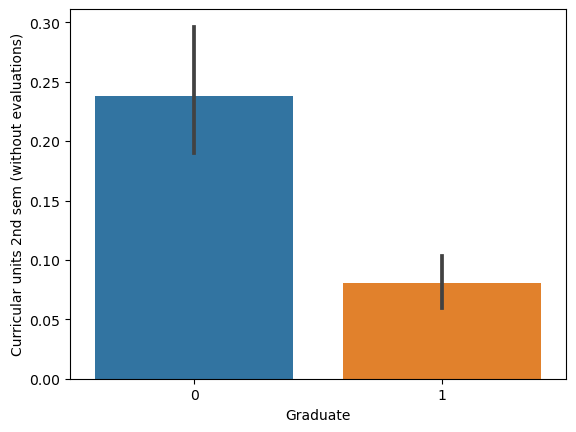

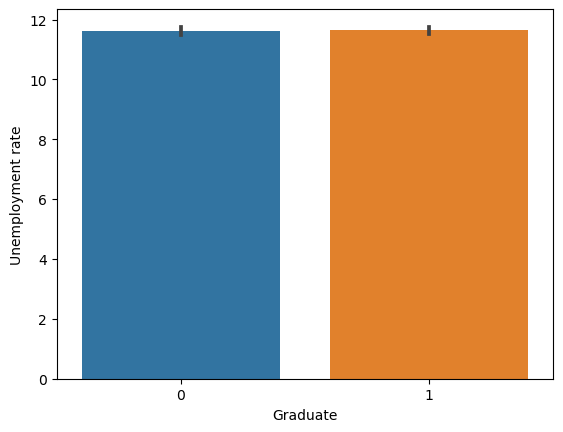

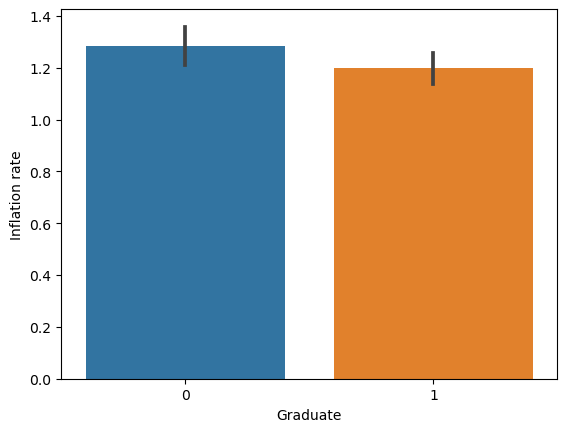

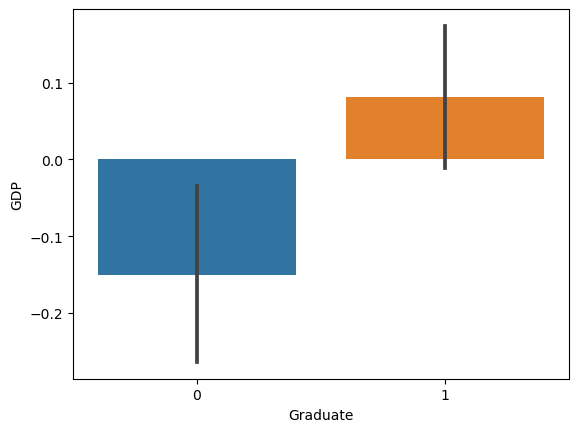

In [17]:
#Visualize Correlations w/ Bar Charts
for col in df2.columns:
    if col != 'Target_Graduate':
        sns.barplot(data=df2, x='Target_Graduate', y=col)
        plt.xlabel('Graduate')
        plt.ylabel(col)
        plt.show()

In [18]:
#Use heatmap, scatter plots and correlations to determine features of most importance for regression

#Features of most importance
#1st Phase Applications positive on graduation, other types of applicaitons negative
#Nursing program is a positive for gradutation (Program Needs a Separate Analysis, but should be included here as well)
#Debtor, Fees & Scholarship are vital (these are all financial pieces, might be the most important)
#Gender (Males graduating at a much lower rate that females)
#Age of Applicant
#Curricular Units in 1st & 2nd Semester

#Subset Data Frame for Most Important Variables


Text(0.5, 1.0, 'Dropout Rates by Program')

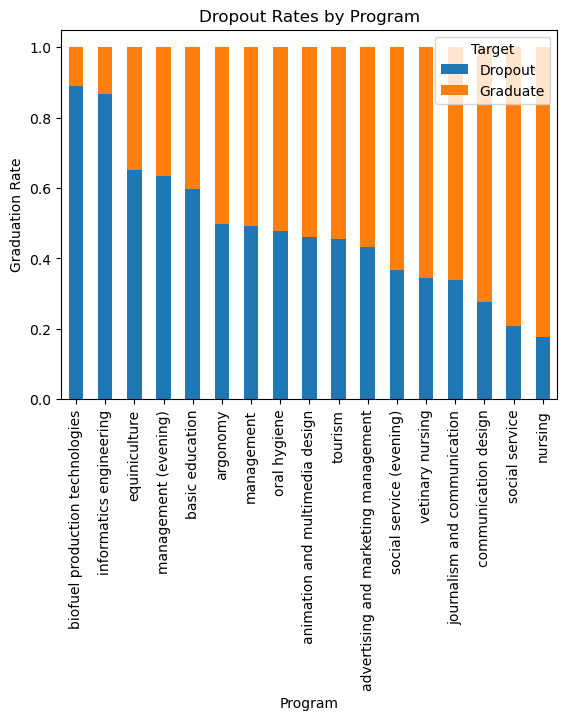

In [19]:
#Visualize Program Data, There are Programs that have much higher dropout rates to share with the team. 
dfc = df[['Course', 'Target']]
a = dfc.groupby("Course")["Target"].value_counts(normalize=True).unstack().sort_values("Graduate")
a.plot(kind='bar', stacked=True)
plt.ylabel("Graduation Rate")
plt.xlabel("Program")
plt.title("Dropout Rates by Program")

In [20]:
#Train, Test, Split
x = df2[["Target_Dropout"]]
y = df2[["Debtor_yes", "Tuition fees up to date_no", "Gender_male", "Scholarship holder_no", "Application mode_other", "Age at enrollment", "Curricular units 2nd sem (approved)", "Curricular units 1st sem (approved)"]]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25, random_state=44)

In [21]:
#Multiple Linear Regresson
rModel = linear_model.LinearRegression()
rModel.fit(x_train, y_train)

LinearRegression()

In [22]:
#Analyze
rModel.score(x_train, y_train)

0.16284685811602917

In [23]:
#predictions
y_model = rModel.predict(x_test)

Text(0, 0.5, 'Predicted Dropout')

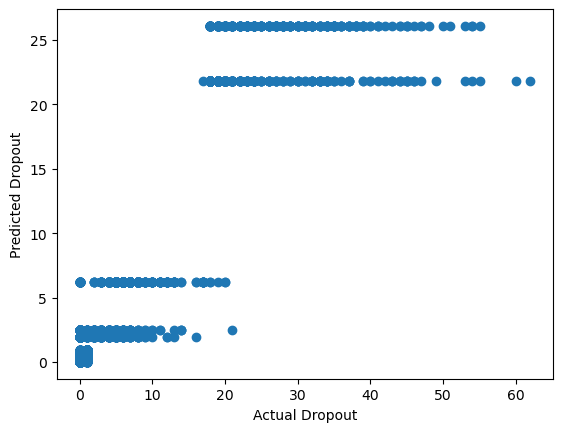

In [24]:
#Visualize
plt.scatter(y_test, y_model)
plt.xlabel("Actual Dropout")
plt.ylabel("Predicted Dropout")

In [25]:
#Just Fees
x = df2[["Target_Dropout"]]
y = df2[["Tuition fees up to date_no"]]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25, random_state=44)

rModel1 = linear_model.LinearRegression()
rModel1.fit(x_train, y_train)

LinearRegression()

In [26]:
#Analyze
rModel1.score(x_train, y_train)

0.19810979834339482

Text(0, 0.5, 'Predicted Dropout')

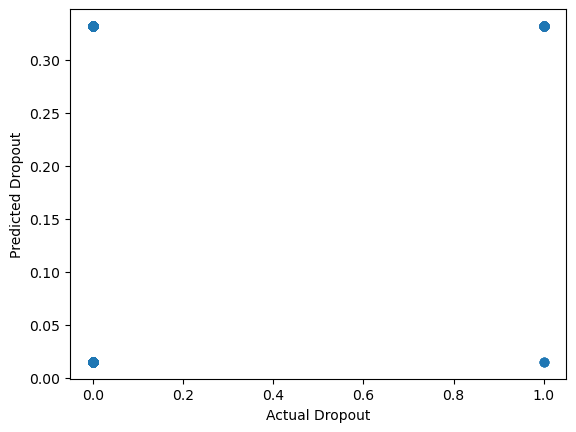

In [27]:
#Visualize (It's pretty clear this isn't linear)
y_model1 = rModel1.predict(x_test)
plt.scatter(y_test, y_model1)
plt.xlabel("Actual Dropout")
plt.ylabel("Predicted Dropout")

In [28]:
#Logistic Regression
#Train, Test, Split
y = df2[["Target_Dropout"]]
x = df2[["Debtor_yes", "Tuition fees up to date_no", "Gender_male", "Scholarship holder_no", "Application mode_other", "Age at enrollment", "Curricular units 2nd sem (approved)", "Curricular units 1st sem (approved)"]]
y = y.values.ravel()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25, random_state=44)

logreg = LogisticRegression()
rfe = RFE(logreg, step=8)
logistic_model = rfe.fit(x_train, y_train)

In [29]:
#Analyze
y_pred = logistic_model.predict(x_test)

In [30]:
#Accuracy Check 88% is way better. 
np.round(np.sum(y_test == y_pred)/len(y_test) * 100, 1)


88.1

In [31]:
#Model 2: Check Redundancy, New Model removing Debtor (fees were a stronger indicator)
y = df2[["Target_Dropout"]]
x = df2[["Tuition fees up to date_no", "Gender_male", "Scholarship holder_no", "Application mode_other", "Age at enrollment", "Curricular units 2nd sem (approved)"]]
y = y.values.ravel()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25, random_state=44)

logreg = LogisticRegression()
rfe = RFE(logreg, step=6)
logistic_model2 = rfe.fit(x_train, y_train)

In [32]:
#Analyze (Slight Improvement)
y_pred = logistic_model2.predict(x_test)
np.round(np.sum(y_test == y_pred)/len(y_test) * 100, 1)

88.2

In [33]:
#Model 3: Try this with Nursing or Not Incorporated (no change)
y = df2[["Target_Dropout"]]
x = df2[["Tuition fees up to date_no", "Gender_male", "Scholarship holder_no", "Application mode_other", "Age at enrollment", "Curricular units 2nd sem (approved)", "Course_nursing"]]
y = y.values.ravel()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25, random_state=44)

logreg = LogisticRegression()
rfe = RFE(logreg, step=7)
logistic_model3 = rfe.fit(x_train, y_train)

y_pred = logistic_model3.predict(x_test)
np.round(np.sum(y_test == y_pred)/len(y_test) * 100, 1)

88.2

In [34]:
#Model 4: Try this with Nursing & Social Service (Drops back down)
y = df2[["Target_Dropout"]]
x = df2[["Tuition fees up to date_no", "Gender_male", "Scholarship holder_no", "Application mode_other", "Age at enrollment", "Curricular units 2nd sem (approved)", "Course_nursing", "Course_social service"]]
y = y.values.ravel()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25, random_state=44)

logreg = LogisticRegression()
rfe = RFE(logreg, step=8)
logistic_model4 = rfe.fit(x_train, y_train)

y_pred = logistic_model4.predict(x_test)
np.round(np.sum(y_test == y_pred)/len(y_test) * 100, 1)

88.1

In [35]:
#Model 5: Model 3 + No High School Diploma Previously
y = df2[["Target_Dropout"]]
x = df2[["Tuition fees up to date_no", "Gender_male", "Scholarship holder_no", "Application mode_other", "Age at enrollment", "Curricular units 2nd sem (approved)", "Course_nursing", "Previous qualification_No High School"]]
y = y.values.ravel()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25, random_state=44)

logreg = LogisticRegression()
rfe = RFE(logreg, step=8)
logistic_model5 = rfe.fit(x_train, y_train)

y_pred = logistic_model5.predict(x_test)
np.round(np.sum(y_test == y_pred)/len(y_test) * 100, 1)

88.2

In [36]:
#Model 6: Model 3 with all programs added
y = df2[["Target_Dropout"]]
x = df2[["Tuition fees up to date_no", "Gender_male", "Scholarship holder_no", "Application mode_other", "Age at enrollment", "Curricular units 2nd sem (approved)", 'Course_advertising and marketing management',
       'Course_animation and multimedia design', 'Course_argonomy',
       'Course_basic education', 'Course_biofuel production technologies',
       'Course_communication design', 'Course_equiniculture',
       'Course_informatics engineering', 'Course_journalism and communication',
       'Course_management', 'Course_management (evening)', 'Course_nursing',
       'Course_oral hygiene', 'Course_social service',
       'Course_social service (evening)', 'Course_tourism',
       'Course_vetinary nursing']]
y = y.values.ravel()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25, random_state=44)

logreg = LogisticRegression(max_iter=23)
rfe = RFE(logreg, step=23)
logistic_model6 = rfe.fit(x_train, y_train)

y_pred = logistic_model6.predict(x_test)
np.round(np.sum(y_test == y_pred)/len(y_test) * 100, 1)

C:\Users\dpatteson\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dpatteson\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

88.4

In [37]:
#Choose
#Our regression is best when we analyze if fees are up to date, the gender of our student, if the student is a scholarship holder,
#if they applied outside of Phase 1 or Phase 2, their age at enrollment, their second semester curricular units approved & course of study. 
#We choose Model 6, the logistic regression that pulled from those 7 places. 
#We also can take our stacked bar chart of program graduation rate to the Deans as this information is also vital to graduation rates. 